<a href="https://colab.research.google.com/github/chrisfinan/IDS/blob/main/HW6/HW6_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chris Finan

> 12/11/23

> Project 6

###Description

> In this problem, you will work with the loans_training and loans_test datasets found here: https://github.com/bforoura/IDS/tree/main/HW6

> I will be creating CART and C5 models, displaying decision trees, evaluating their splits and evaluating the accuracy of each model.



In [203]:
# Let's read in the data files
library(readr)
loans_test <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW6/Loans_Test.csv", show_col_types = FALSE)

loans_training <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW6/Loans_Training.csv", show_col_types = FALSE)


In [204]:
# Convert to data frame and summarize
summary(loans_test)

  Approval       Debt-to-Income Ratio   FICO Score    Request Amount 
 Mode :logical   Min.   :0.0000       Min.   :372.0   Min.   :  500  
 FALSE:24934     1st Qu.:0.0900       1st Qu.:647.0   1st Qu.: 6000  
 TRUE :24764     Median :0.1600       Median :684.0   Median :11000  
                 Mean   :0.1831       Mean   :672.3   Mean   :13413  
                 3rd Qu.:0.2400       3rd Qu.:714.0   3rd Qu.:19000  
                 Max.   :1.0500       Max.   :866.0   Max.   :42000  
    Interest    
 Min.   :  225  
 1st Qu.: 2700  
 Median : 4950  
 Mean   : 6036  
 3rd Qu.: 8550  
 Max.   :18900  

In [205]:
# Convert to data frame and summarize
summary(loans_training)

  Approval       Debt-to-Income Ratio   FICO Score  Request Amount 
 Mode :logical   Min.   :0.0000       Min.   :371   Min.   :  500  
 FALSE:75066     1st Qu.:0.0900       1st Qu.:647   1st Qu.: 6000  
 TRUE :75236     Median :0.1600       Median :684   Median :11000  
                 Mean   :0.1835       Mean   :672   Mean   :13427  
                 3rd Qu.:0.2400       3rd Qu.:714   3rd Qu.:19000  
                 Max.   :1.0300       Max.   :869   Max.   :44000  
    Interest    
 Min.   :  225  
 1st Qu.: 2700  
 Median : 4950  
 Mean   : 6042  
 3rd Qu.: 8550  
 Max.   :19800  

## 1. Create a CART model using the training data set that predicts Approval using Debt-to-Income Ratio, FICO Score, etc. Visualize the decision tree and Describe the first few splits in the decision tree.

In [206]:
#access necessary libraries to create the CART model
library(rpart)
install.packages("rpart.plot")
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



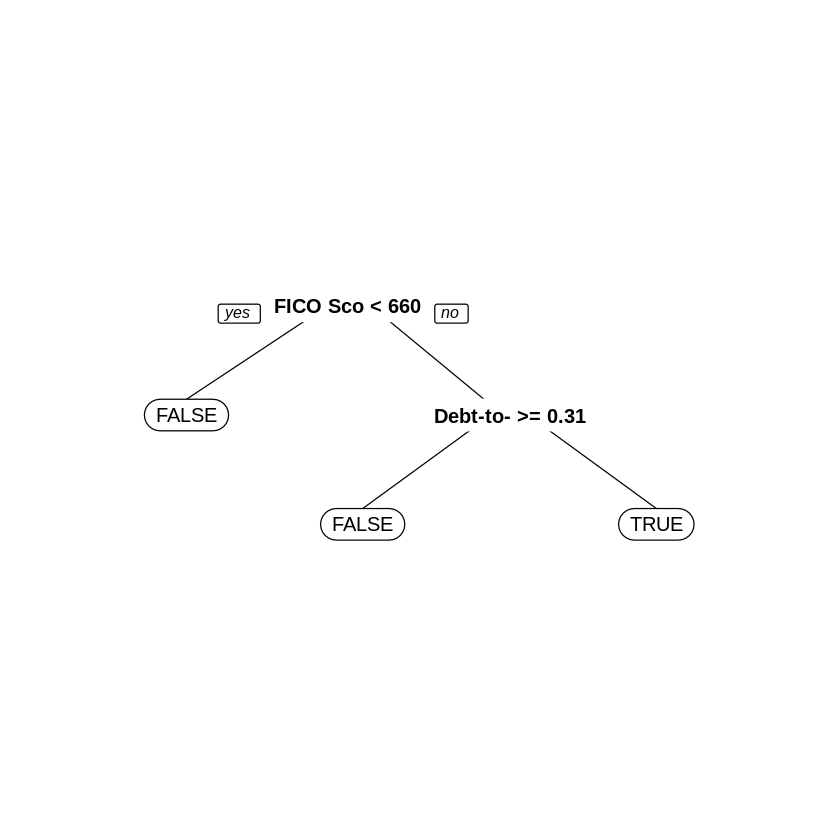

In [207]:
#create the CART model with Approval as the target and all other variables as the x values
cart_model <- rpart(Approval ~ `Debt-to-Income Ratio` + `FICO Score` + `Request Amount` + Interest, data = loans_training, method = "class")

#visualize the decision tree
prp(cart_model)

As you can see, FICO Score is the most important variable with a value of 74. The first split was FICO Score < 660. The expected loss value for each node represents the impurity of it. It is similar to gini or entropy. The expected loss of the root node before the first split is 0.499 which is basically a 50-50 split. The leftmost leaf node is false and has a very low expected loss, so it does not need to be split again. The right node after this split has a value of about 0.3 which is not great, so it is split again. The second most important variable is Debt-to-Income Ratio with a value of 25. It is used in the second decision tree split where Debt-to-Income Ratio >= 0.31. This split leads to two leaf nodes and the decision tree ending.

In [208]:
summary(cart_model)

Call:
rpart(formula = Approval ~ `Debt-to-Income Ratio` + `FICO Score` + 
    `Request Amount` + Interest, data = loans_training, method = "class")
  n= 150302 

         CP nsplit rel error    xerror        xstd
1 0.5646498      0 1.0000000 1.0052221 0.002582293
2 0.1267551      1 0.4353502 0.4353502 0.002130393
3 0.0100000      2 0.3085951 0.3085951 0.001864775

Variable importance
          FICO Score Debt-to-Income Ratio 
                  74                   25 

Node number 1: 150302 observations,    complexity param=0.5646498
  predicted class=TRUE   expected loss=0.4994345  P(node) =1
    class counts: 75066 75236
   probabilities: 0.499 0.501 
  left son=2 (46002 obs) right son=3 (104300 obs)
  Primary splits:
      FICO Score           < 659.5 to the left,  improve=28208.770, (0 missing)
      Debt-to-Income Ratio < 0.305 to the right, improve= 8986.886, (0 missing)
      Request Amount       < 25500 to the right, improve= 1191.854, (0 missing)
      Interest             < 1

Using the testing dataframe, we can make predictions and evaluate the accuracy on the CART model.

In [209]:
#factor approval testing data
loans_test$Approval <- factor(loans_test$Approval)

#use predict function to create predictions with the testing set
predictions <- predict(cart_model, newdata = loans_test, type ="class")

#check the accuracy of the predictions
accuracy <- mean(predictions == loans_test$Approval)

#print accuracy
cat("CART Testing Accuracy: ", accuracy)


CART Testing Accuracy:  0.8432331

## 2. Build a C5.0 model using the same predictors and target as in part 1.  This time, specify a minimum of 1000 cases per terminal node. Visualize the decision tree. Describe the first few splits in the decision tree.

In [210]:
#access packages for c5 model
install.packages("C50")
library(C50)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



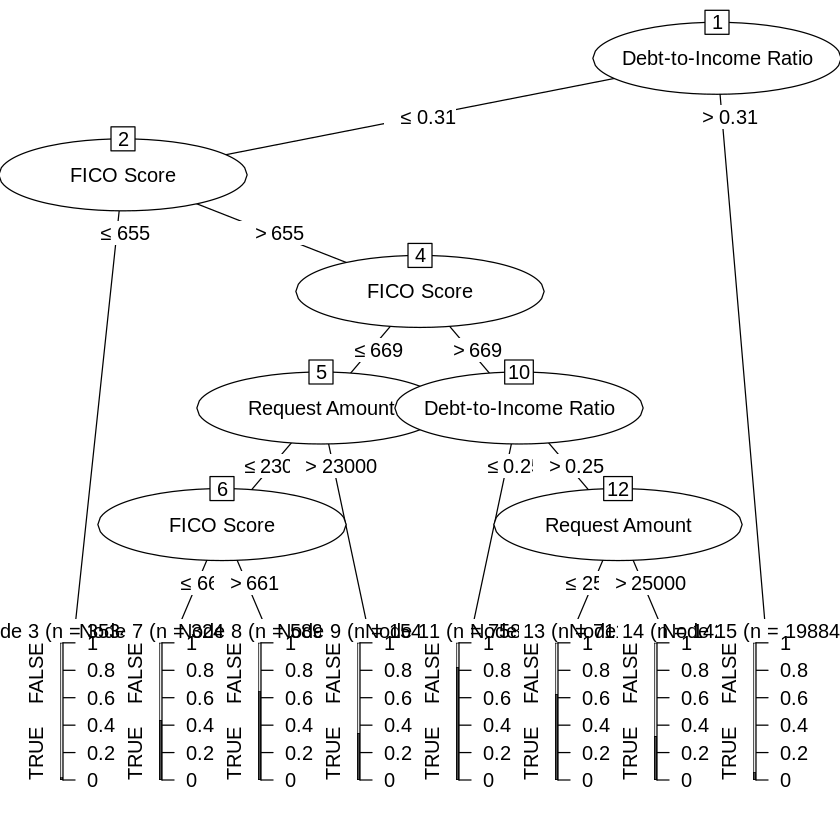

In [211]:
#had an error that said target needs to be factored
loans_training$Approval <- factor(loans_training$Approval)

#create the c5 model with 1000 minimum cases
c5_model <- C5.0(Approval ~ `Debt-to-Income Ratio` + `FICO Score` + `Request Amount` + Interest, data = loans_training, control = C5.0Control(minCases = 1000))

#plot the c5 model (some parts overlap)
plot(c5_model)

Unfortunately the bottom of the decision tree overlaps itself and makes it harder to read. In this decision tree, the first split is based on Debt-to-Income Ratio with the threshold being 0.31. The node that is >0.31 becomes a leaf node but is cut off at the bottom. There is a good split and it does not need to be split again (FALSE: 19884/1160). The second split uses FICO Score at 655. It makes one leaf node (<=655) (FALSE: 35346/894) and continues splitting with the other node (>655). The ratios that I am showing in parentheses show the purity of the nodes. Those ratios are similar to that of entropy. FICO Score is used 3 different times to split the data while Debt-to-Income Ratio is used twice. Request Amount is also used twice towards the bottom. However in the "Attribute usage" below, Debt-to-Income Ratio is listed with the highest percent:
- 100.00%	Debt-to-Income Ratio
- 86.77%	FICO Score
- 12.79%	Request Amount

In [212]:
#print the summary of the c5 model
summary(c5_model)


Call:
C5.0.formula(formula = Approval ~ `Debt-to-Income Ratio` + `FICO Score`
 + `Request Amount` + Interest, data = loans_training, control
 = C5.0Control(minCases = 1000))


C5.0 [Release 2.07 GPL Edition]  	Tue Dec 12 02:21:54 2023
-------------------------------

Class specified by attribute `outcome'

Read 150302 cases (5 attributes) from undefined.data

Decision tree:

Debt-to-Income Ratio > 0.31: FALSE (19884/1160)
Debt-to-Income Ratio <= 0.31:
:...FICO Score <= 655: FALSE (35346/894)
    FICO Score > 655:
    :...FICO Score <= 669:
        :...Request Amount > 23000: FALSE (1547/529)
        :   Request Amount <= 23000:
        :   :...FICO Score <= 661: FALSE (3246/1418)
        :       FICO Score > 661: TRUE (5892/2056)
        FICO Score > 669:
        :...Debt-to-Income Ratio <= 0.25: TRUE (75846/13356)
            Debt-to-Income Ratio > 0.25:
            :...Request Amount <= 25000: TRUE (7112/2658)
                Request Amount > 25000: FALSE (1429/455)


Evaluation on 

Using the testing dataframe, we can make predictions and evaluate the accuracy on the C5 model.

In [213]:
#don't need to factor again because that column was already taken care of above
#use predict function to create predictions with the testing set
predictions <- predict(c5_model, newdata = loans_test, type ="class")

#check the accuracy of the predictions
accuracy <- mean(predictions == loans_test$Approval)

#print accuracy
cat("C5 Testing Accuracy: ", accuracy)

C5 Testing Accuracy:  0.8471568

## 3. How does your C5.0 model compare to your CART model for the loans_training data? Describe the similarities and differences.

- FICO score is seen as the most important variable for the CART model where Debt-to-Income Ratio seems to be higher in importance for the C5 model. Those most important variables were also used as the first split in each tree respectively.
- Both models used very close to the same numbers for their splitting thresholds even though they were in a different order.
- The CART model did not use Request Amount when splitting.
- The C5 model displayed many more nodes and splits than the CART model
- CART displayed 5 nodes and listed 7 in the summary
- C5 displayed 7 nodes and listed 14 in the summary (the lines are drawn in the picture but the nodes are cut off)
- The first two leaf nodes for both models are labeled as FALSE
- The C5 model is slightly more accurate on the testing values than the CART model - C5=0.847 / CART=0.843